In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# I reload the data manually

files = ['Monday-WorkingHours.pcap_ISCX.csv', 'Tuesday-WorkingHours.pcap_ISCX.csv', 'Wednesday-workingHours.pcap_ISCX.csv', 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'Friday-WorkingHours-Morning.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv']
li = []
for filename in files:
    df = pd.read_csv(filename)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Binary_Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [4]:
# remove leading spaces
frame.columns = frame.columns.str.lstrip()

In [5]:
pd.value_counts(frame['Label'])

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [12]:
# relevancy as defined by  Thomas
relevant_features_rf = ['Average Packet Size',
  'Avg Fwd Segment Size',
  'Flow Bytes/s',
  'Flow IAT Max',
  'Flow IAT Mean',
  'Fwd Header Length.1',
  'Fwd IAT Mean',
  'Fwd IAT Min',
  'Fwd IAT Total',
  'Fwd Packet Length Mean',
  'Fwd Packet Length Std',
  'Init_Win_bytes_backward',
  'Init_Win_bytes_forward',
  'PSH Flag Count',
  'Packet Length Mean',
  'Subflow Bwd Bytes',
  'Subflow Fwd Bytes',
  'Total Fwd Packets',
  'Total Length of Bwd Packets',
  'Total Length of Fwd Packets',
  'act_data_pkt_fwd']

# relevancy defined by easiness of guessing and rf importance
relevant_features = ['Destination Port',
'Flow Duration',
'Total Backward Packets',
'Total Fwd Packets',
'Packet Length Mean',
'Flow Bytes/s',
'Flow IAT Min',
'Flow IAT Max',
'PSH Flag Count',
'SYN Flag Count',
'RST Flag Count',
'ACK Flag Count']

In [7]:
# get only the relevant data
sub_frame = frame[list(relevant_features)+['Label', 'Binary_Label']]
sub_frame = sub_frame[sub_frame.Binary_Label != 0]
sub_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557646 entries, 541265 to 2823364
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Packet Length Mean      557646 non-null  float64
 1   Flow IAT Max            557646 non-null  int64  
 2   Flow IAT Min            557646 non-null  int64  
 3   SYN Flag Count          557646 non-null  int64  
 4   Total Fwd Packets       557646 non-null  int64  
 5   Destination Port        557646 non-null  int64  
 6   Flow Duration           557646 non-null  int64  
 7   Total Backward Packets  557646 non-null  int64  
 8   Flow Bytes/s            557646 non-null  float64
 9   PSH Flag Count          557646 non-null  int64  
 10  ACK Flag Count          557646 non-null  int64  
 11  RST Flag Count          557646 non-null  int64  
 12  Label                   557646 non-null  object 
 13  Binary_Label            557646 non-null  int64  
dtypes: float64(2),

In [8]:
sub_frame.head()

,Packet Length Mean,Flow IAT Max,Flow IAT Min,SYN Flag Count,Total Fwd Packets,Destination Port,Flow Duration,Total Backward Packets,Flow Bytes/s,PSH Flag Count,ACK Flag Count,RST Flag Count,Label,Binary_Label
541265,0.0,5214882,124,0,3,80,5216127,1,0.0,1,0,0,FTP-Patator,1
541266,0.0,20,20,0,1,21,20,1,0.0,0,1,0,FTP-Patator,1
541267,0.0,38,38,0,1,21,38,1,0.0,0,1,0,FTP-Patator,1
541268,0.0,80,80,0,1,21,80,1,0.0,0,1,0,FTP-Patator,1
541269,0.0,68,68,0,1,21,68,1,0.0,0,1,0,FTP-Patator,1


In [9]:
# means per attack
means = sub_frame.groupby('Label').mean()
means

,Packet Length Mean,Flow IAT Max,Flow IAT Min,SYN Flag Count,Total Fwd Packets,Destination Port,Flow Duration,Total Backward Packets,Flow Bytes/s,PSH Flag Count,ACK Flag Count,RST Flag Count,Binary_Label
Label,,,,,,,,,,,,,
Bot,51.260684,1.726650e+05,1.992487e+02,0.000000,3.193795,17783.990844,3.509427e+05,3.343845,3.055371e+05,0.624619,0.375381,0.0,1.0
DDoS,736.885283,1.583782e+07,2.442396e+03,0.000000,4.472439,81.227382,1.695559e+07,3.255821,6.111693e+04,0.454474,0.546822,0.0,1.0
DoS GoldenEye,501.158612,1.962861e+07,1.131841e+07,0.000000,5.904401,80.000000,2.312722e+07,3.714078,6.882391e+02,0.715632,0.286700,0.0,1.0
DoS Hulk,591.761324,5.669352e+07,7.513308e+02,0.000000,5.279656,80.000000,5.708173e+07,4.205688,2.928097e+04,0.063132,0.682750,0.0,1.0
DoS Slowhttptest,132.171694,3.906159e+07,1.024613e+06,0.163302,5.741771,80.000000,5.771989e+07,0.963812,2.164242e+07,0.766685,0.233315,0.0,1.0
DoS slowloris,50.957426,4.029260e+07,2.869085e+05,0.316943,6.337129,80.000000,5.655437e+07,1.655797,4.392122e+04,0.668219,0.331781,0.0,1.0
FTP-Patator,9.798894,1.631614e+06,7.985538e+01,0.497229,5.496977,21.007433,4.513245e+06,7.808390,7.991625e+05,0.500630,0.499370,0.0,1.0
Heartbleed,1626.602318,1.452711e+06,-3.636364e-01,0.000000,2583.727273,444.000000,1.106797e+08,1897.181818,6.590280e+04,0.090909,0.909091,0.0,1.0
Infiltration,161.101292,3.766240e+07,8.209444e+03,0.555556,830.222222,444.000000,7.840772e+07,829.611111,2.018822e+04,0.166667,0.833333,0.0,1.0


In [10]:
# define two ways to get intervals: linear (with three intervals) or percentiles (50%-median and 80%)

# maybe a for loop instead of t1, t2? Enables choosing a larger step
def get_linear_vector(_class, feature, steps=3):
    _max = frame[feature].max()
    _min = frame[feature].min()
    interval = (_max-_min)/steps
    t1, t2 = _min+interval, _max-interval
    rep = [int(means[feature][_class]<t1), int(means[feature][_class]>t1 and means[feature][_class]<t2), int(means[feature][_class]>t2)]
    return np.argmax(rep), rep

def get_percentile_vector(_class, feature):
    t1, t2 = frame[feature].quantile(0.5), frame[feature].quantile(0.8)
    rep = [int(means[feature][_class]<t1), int(means[feature][_class]>t1 and means[feature][_class]<t2), int(means[feature][_class]>t2)]
    return np.argmax(rep), rep

In [19]:
representations = {}
levels = {}

for attack in means.index:
    # initialize with the port number since we don't have levels here but a specific value
    representations[attack] = [int(means['Destination Port'][attack])] 
    levels[attack] = [int(means['Destination Port'][attack])]
    for feature in relevant_features[1:]: # ignore the destination port
        level, representation = get_percentile_vector(attack, feature)
        representations[attack].append(representation) 
        levels[attack].append(level) 

In [20]:
levels

{'Bot': [17783, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1],
 'DDoS': [81, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1],
 'DoS GoldenEye': [80, 2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1],
 'DoS Hulk': [80, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1],
 'DoS Slowhttptest': [80, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1],
 'DoS slowloris': [80, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1],
 'FTP-Patator': [21, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1],
 'Heartbleed': [444, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1],
 'Infiltration': [444, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1],
 'PortScan': [8624, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
 'SSH-Patator': [22, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1],
 'Web Attack � Brute Force': [80, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1],
 'Web Attack � Sql Injection': [80, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
 'Web Attack � XSS': [80, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1]}

In [21]:
representations

{'Bot': [17783,
  [0, 1, 0],
  [0, 1, 0],
  [0, 1, 0],
  [1, 0, 0],
  [0, 1, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 1, 0]],
 'DDoS': [81,
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 0, 1],
  [0, 0, 1],
  [0, 1, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 1, 0]],
 'DoS GoldenEye': [80,
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 0],
  [0, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [0, 0, 1],
  [0, 1, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 1, 0]],
 'DoS Hulk': [80,
  [0, 0, 1],
  [0, 1, 0],
  [0, 1, 0],
  [0, 0, 1],
  [0, 1, 0],
  [0, 0, 1],
  [0, 0, 1],
  [0, 1, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 1, 0]],
 'DoS Slowhttptest': [80,
  [0, 0, 1],
  [1, 0, 0],
  [0, 1, 0],
  [0, 1, 0],
  [0, 0, 1],
  [0, 0, 1],
  [0, 0, 1],
  [0, 1, 0],
  [0, 0, 1],
  [0, 0, 0],
  [0, 1, 0]],
 'DoS slowloris': [80,
  [0, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [1, 0, 0],
  [0, 1, 0],
  [0, 0, 1],
  [0, 0, 1],
  [0, 1, 0],
  [0, 0, 1],
  [0, 0, 0],
  [0, 1, 0]],
 'FTP-Patator': 

In [22]:
# check if we don't have duplicate representations
counter = 0
for item1 in representations.values():
    for item2 in representations.values():
        if item1 == item2:
            counter+=1
print(int((counter-len(representations.values()))/2), 'duplicate representations detected')

0 duplicate representations detected


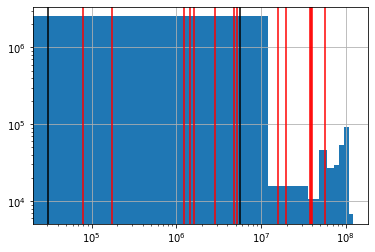

In [23]:
# play with one distribution to guess the best percentiles. Goal is to have ...meeh... separation
feature = 'Flow IAT Max'
plt.figure()
frame[feature].hist(log=True)
for xc in means[feature]:
    plt.axvline(x=xc, c='r')
plt.axvline(x=frame[feature].quantile(0.5), c='black')
plt.axvline(x=frame[feature].quantile(0.8), c='black')
plt.xscale('log')

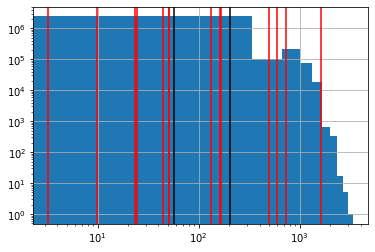

In [24]:
# play with one distribution to guess the best percentiles
feature = 'Packet Length Mean'
plt.figure()
frame[feature].hist(log=True)
for xc in means[feature]:
    plt.axvline(x=xc, c='r')
plt.axvline(x=frame[feature].quantile(0.5), c='black')
plt.axvline(x=frame[feature].quantile(0.8), c='black')
plt.xscale('log')